## Import

In [1]:
import torch
import matplotlib.pyplot as plt 
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

import PIL.ImageOps
import requests
from PIL import Image

## Open up an image 

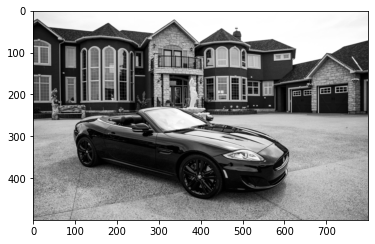

In [2]:
# You can resize to any shape
transform  = transforms.Compose([transforms.Resize((500,800)),
                                 transforms.ToTensor()
                                ])

# you can change the image url to any web images
url = 'https://images.unsplash.com/photo-1562596133-06ae520e8c7e?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=2102&q=80'
response = requests.get(url, stream = True)
img = Image.open(response.raw)

# Convert image to grey-scaled
img = img.convert('L')

# Resize image and transform the image to Tensor format
img = transform(img)
# print (img.shape)  (1, 500, 800)

plt.imshow(transforms.ToPILImage()(img), cmap='gray')

In [3]:
conv_layer = nn.Conv2d(in_channels=1, out_channels= 6, kernel_size=(3, 3), stride=1, padding=1)
print ("Total conv_layer filters: ", len(conv_layer.weight))

Total conv_layer filters:  6


## Customized Filter


In [4]:
sobel_filter_x = torch.Tensor([[[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]])
sobel_filter_y = torch.Tensor([[[-1, -2, -1], [0, 0, 0], [1, 2, 1]]])

# change the first conv filter to sobel_filter_x
# and the second conv filter to sobel_filter_y
conv_layer.weight[0] = sobel_filter_x
conv_layer.weight[1] = sobel_filter_y

## UnSqueeze

In [5]:
print ("Shape before unsqueeze: ", img.shape)
four_dim_img = img.unsqueeze(0)
print ("Shape before conv layer： ", four_dim_img.shape)
convoluted_img = conv_layer(four_dim_img)
print('Shape after conv layer: ', convoluted_img.shape)


Shape before unsqueeze:  torch.Size([1, 500, 800])
Shape before conv layer：  torch.Size([1, 1, 500, 800])
Shape after conv layer:  torch.Size([1, 6, 500, 800])


## Relu 

In [6]:
relu_conv_img = F.relu(convoluted_img)
print (relu_conv_img.shape)

torch.Size([1, 6, 500, 800])


## MaxPooling

In [7]:
max_relu_conv_img = F.max_pool2d(relu_conv_img, kernel_size=(2, 2), stride=2)
print (max_relu_conv_img.shape)

torch.Size([1, 6, 250, 400])


## Visualizaion

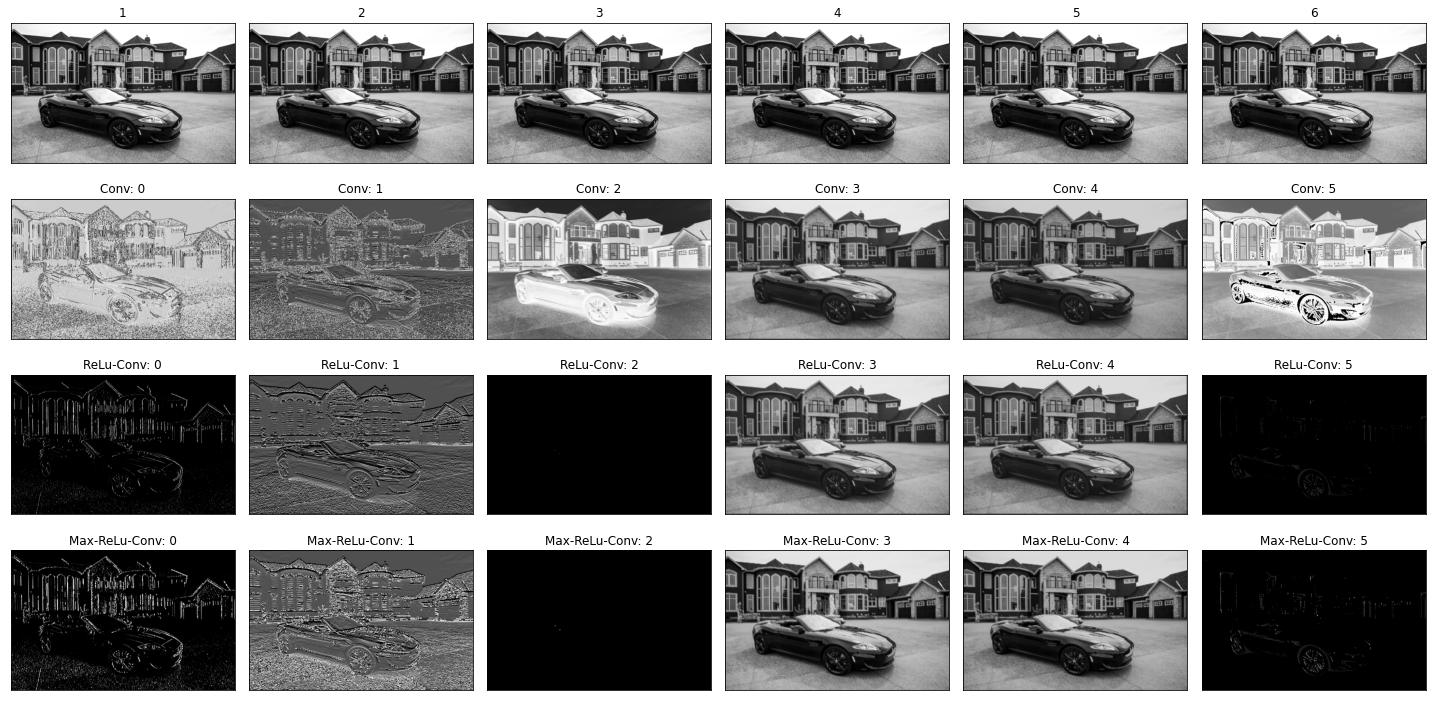

In [8]:
fig=plt.figure(figsize=(20, 10))

# Original Images
for idx in range(1,7):
  fig.add_subplot(4, 6, idx, xticks=[], yticks=[])
  plt.title(idx)
  plt.imshow(transforms.ToPILImage()(img), cmap="gray")

# Images after conv-layer
for idx in range(7, 13):
  fig.add_subplot(4, 6, idx, xticks=[], yticks=[])
  plt.title("Conv: " + str(idx%7))
  plt.imshow(transforms.ToPILImage()(convoluted_img.squeeze(0)[idx%7]), cmap="gray")

# Images after ReLu
for idx in range(13, 19):
  fig.add_subplot(4, 6, idx, xticks=[], yticks=[])
  plt.title("ReLu-Conv: " + str(idx%13))
  plt.imshow(transforms.ToPILImage()(relu_conv_img.squeeze(0)[idx%13]), cmap="gray")

# Images after Max_pooling
for idx in range(19, 25):
  fig.add_subplot(4, 6, idx, xticks=[], yticks=[])
  plt.title("Max-ReLu-Conv: " + str(idx%19))
  plt.imshow(transforms.ToPILImage()(max_relu_conv_img.squeeze(0)[idx%19]), cmap="gray")

fig.tight_layout()
plt.show()